# Running the allocation algorithm for different setups
Example of Vanos scores in different European regions

To run this jupyter notebook, you need to upload the necessary vanos files in "inputs/tor_runs/"

In [1]:
# imports
import sys
sys.path.append("../utils")
import utils as ut
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns
import glob
# file location
path = "../inputs/tor_runs/"

## Part 1: Southern Europe
Note: here, all three cases are treated separately. Therefore, lead_ID = lead time, and not (case, lead_time)

In [2]:
# === open file, rename to fit code convertions and saved separately ===
for variable in ["Vanos","WBA"]:
    ds = xr.open_dataset(f"{path}{variable}_south.nc").rename({"event":"case","leadtime":"lead_ID","realization":"member"}).drop_vars(("quantile"))
    cases = [] # list of the three cases
    for case in ds.case:
        cases.append(case.values)
        ds["lead_ID"] = [f"{str(ld)[0:10]}" for ld in ds.lead_ID.values]
        ds.sel(case=case).dropna("lead_ID",how="all").drop_vars("case").to_netcdf(f"{path}boosted_{case.values}_{variable}.nc")

/tmp/ipykernel_59949/666965364.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[j][i].set_xticklabels(score_case.lead_ID.values,rotation=45)
/tmp/ipykernel_59949/666965364.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[j][i].set_xticklabels(score_case.lead_ID.values,rotation=45)
/tmp/ipykernel_59949/666965364.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[j][i].set_xticklabels(score_case.lead_ID.values,rotation=45)
/tmp/ipykernel_59949/666965364.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[j][i].set_xticklabels(score_case.lead_ID.values,rotation=45)
/tmp/ipykernel_59949/666965364.py:11: UserWarning: set_ticklabels() shou

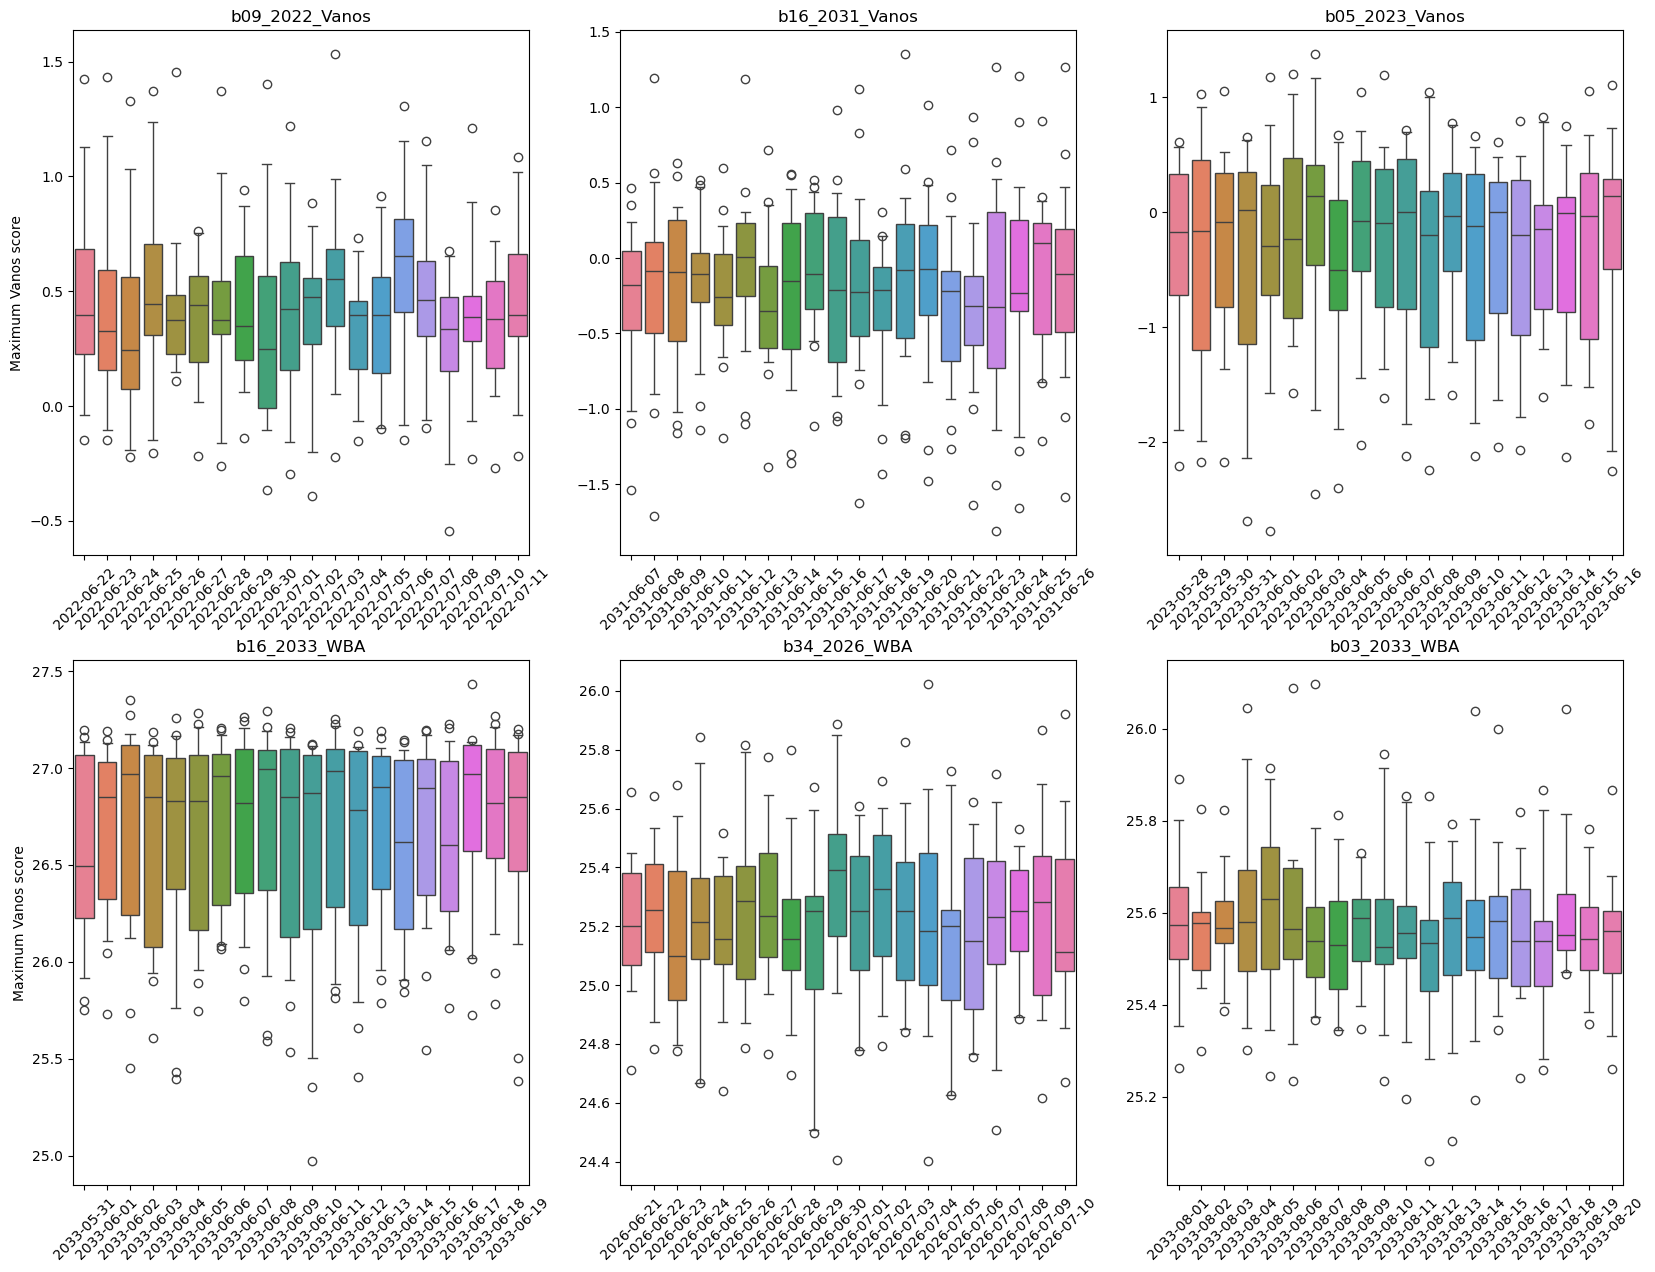

In [5]:
# === Analysis of boosted results so far ===
#figure params
f,ax = plt.subplots(2,3,figsize=(20,15))#,sharey=True)
whis = (5,95) #whisker setting on box plot
for j,variable in enumerate(["Vanos","WBA"]):
    files = glob.glob(f"{path}boosted_*_{variable}.nc")
    for i,f in enumerate(files):
        score_case = xr.open_dataset(f).score
        sns.boxplot(score_case,ax=ax[j][i],whis=whis)
        ax[j][i].set_title(f[27:-3])
        ax[j][i].set_xticklabels(score_case.lead_ID.values,rotation=45)
    ax[j][0].set_ylabel("Maximum Vanos score")

In [4]:
# === Run ===
n_top = 10 # the number of top events to be taken into account for the allocation
n_batch = 100 # the total number of new allocated realizations
allocation_type = "Weighted"
for j,variable in enumerate(["Vanos","WBA"]):
    files = glob.glob(f"{path}boosted_*_{variable}.nc")
    for i,f in enumerate(files):
        print(f[27:-3])
        %run ../code/allocation_algorithm.py {f} {n_top} {n_batch} {allocation_type}

b09_2022_Vanos
opening ../inputs/tor_runs/boosted_b09_2022_Vanos.nc, allocation length = 10, batch size = 100
{'2022-06-24': 34, '2022-06-25': 36, '2022-06-27': 20, '2022-07-04': 6, '2022-06-23': 4}
b16_2031_Vanos
opening ../inputs/tor_runs/boosted_b16_2031_Vanos.nc, allocation length = 10, batch size = 100
{'2031-06-08': 20, '2031-06-22': 16, '2031-06-19': 16, '2031-06-11': 13, '2031-06-26': 13, '2031-06-27': 11, '2031-06-16': 8, '2031-06-18': 3, '2031-06-23': 0}
b05_2023_Vanos
opening ../inputs/tor_runs/boosted_b05_2023_Vanos.nc, allocation length = 10, batch size = 100
{'2023-06-08': 47, '2023-06-09': 20, '2023-06-17': 22, '2023-06-04': 11, '2023-06-13': 0}
b16_2033_WBA
opening ../inputs/tor_runs/boosted_b16_2033_WBA.nc, allocation length = 10, batch size = 100
{'2033-06-03': 40, '2033-06-10': 32, '2033-06-08': 11, '2033-06-17': 6, '2033-06-16': 4, '2033-06-13': 4, '2033-06-20': 2, '2033-06-18': 1}
b34_2026_WBA
opening ../inputs/tor_runs/boosted_b34_2026_WBA.nc, allocation length = 

## Part 2: Northern Europe
Here, all cases are treated together

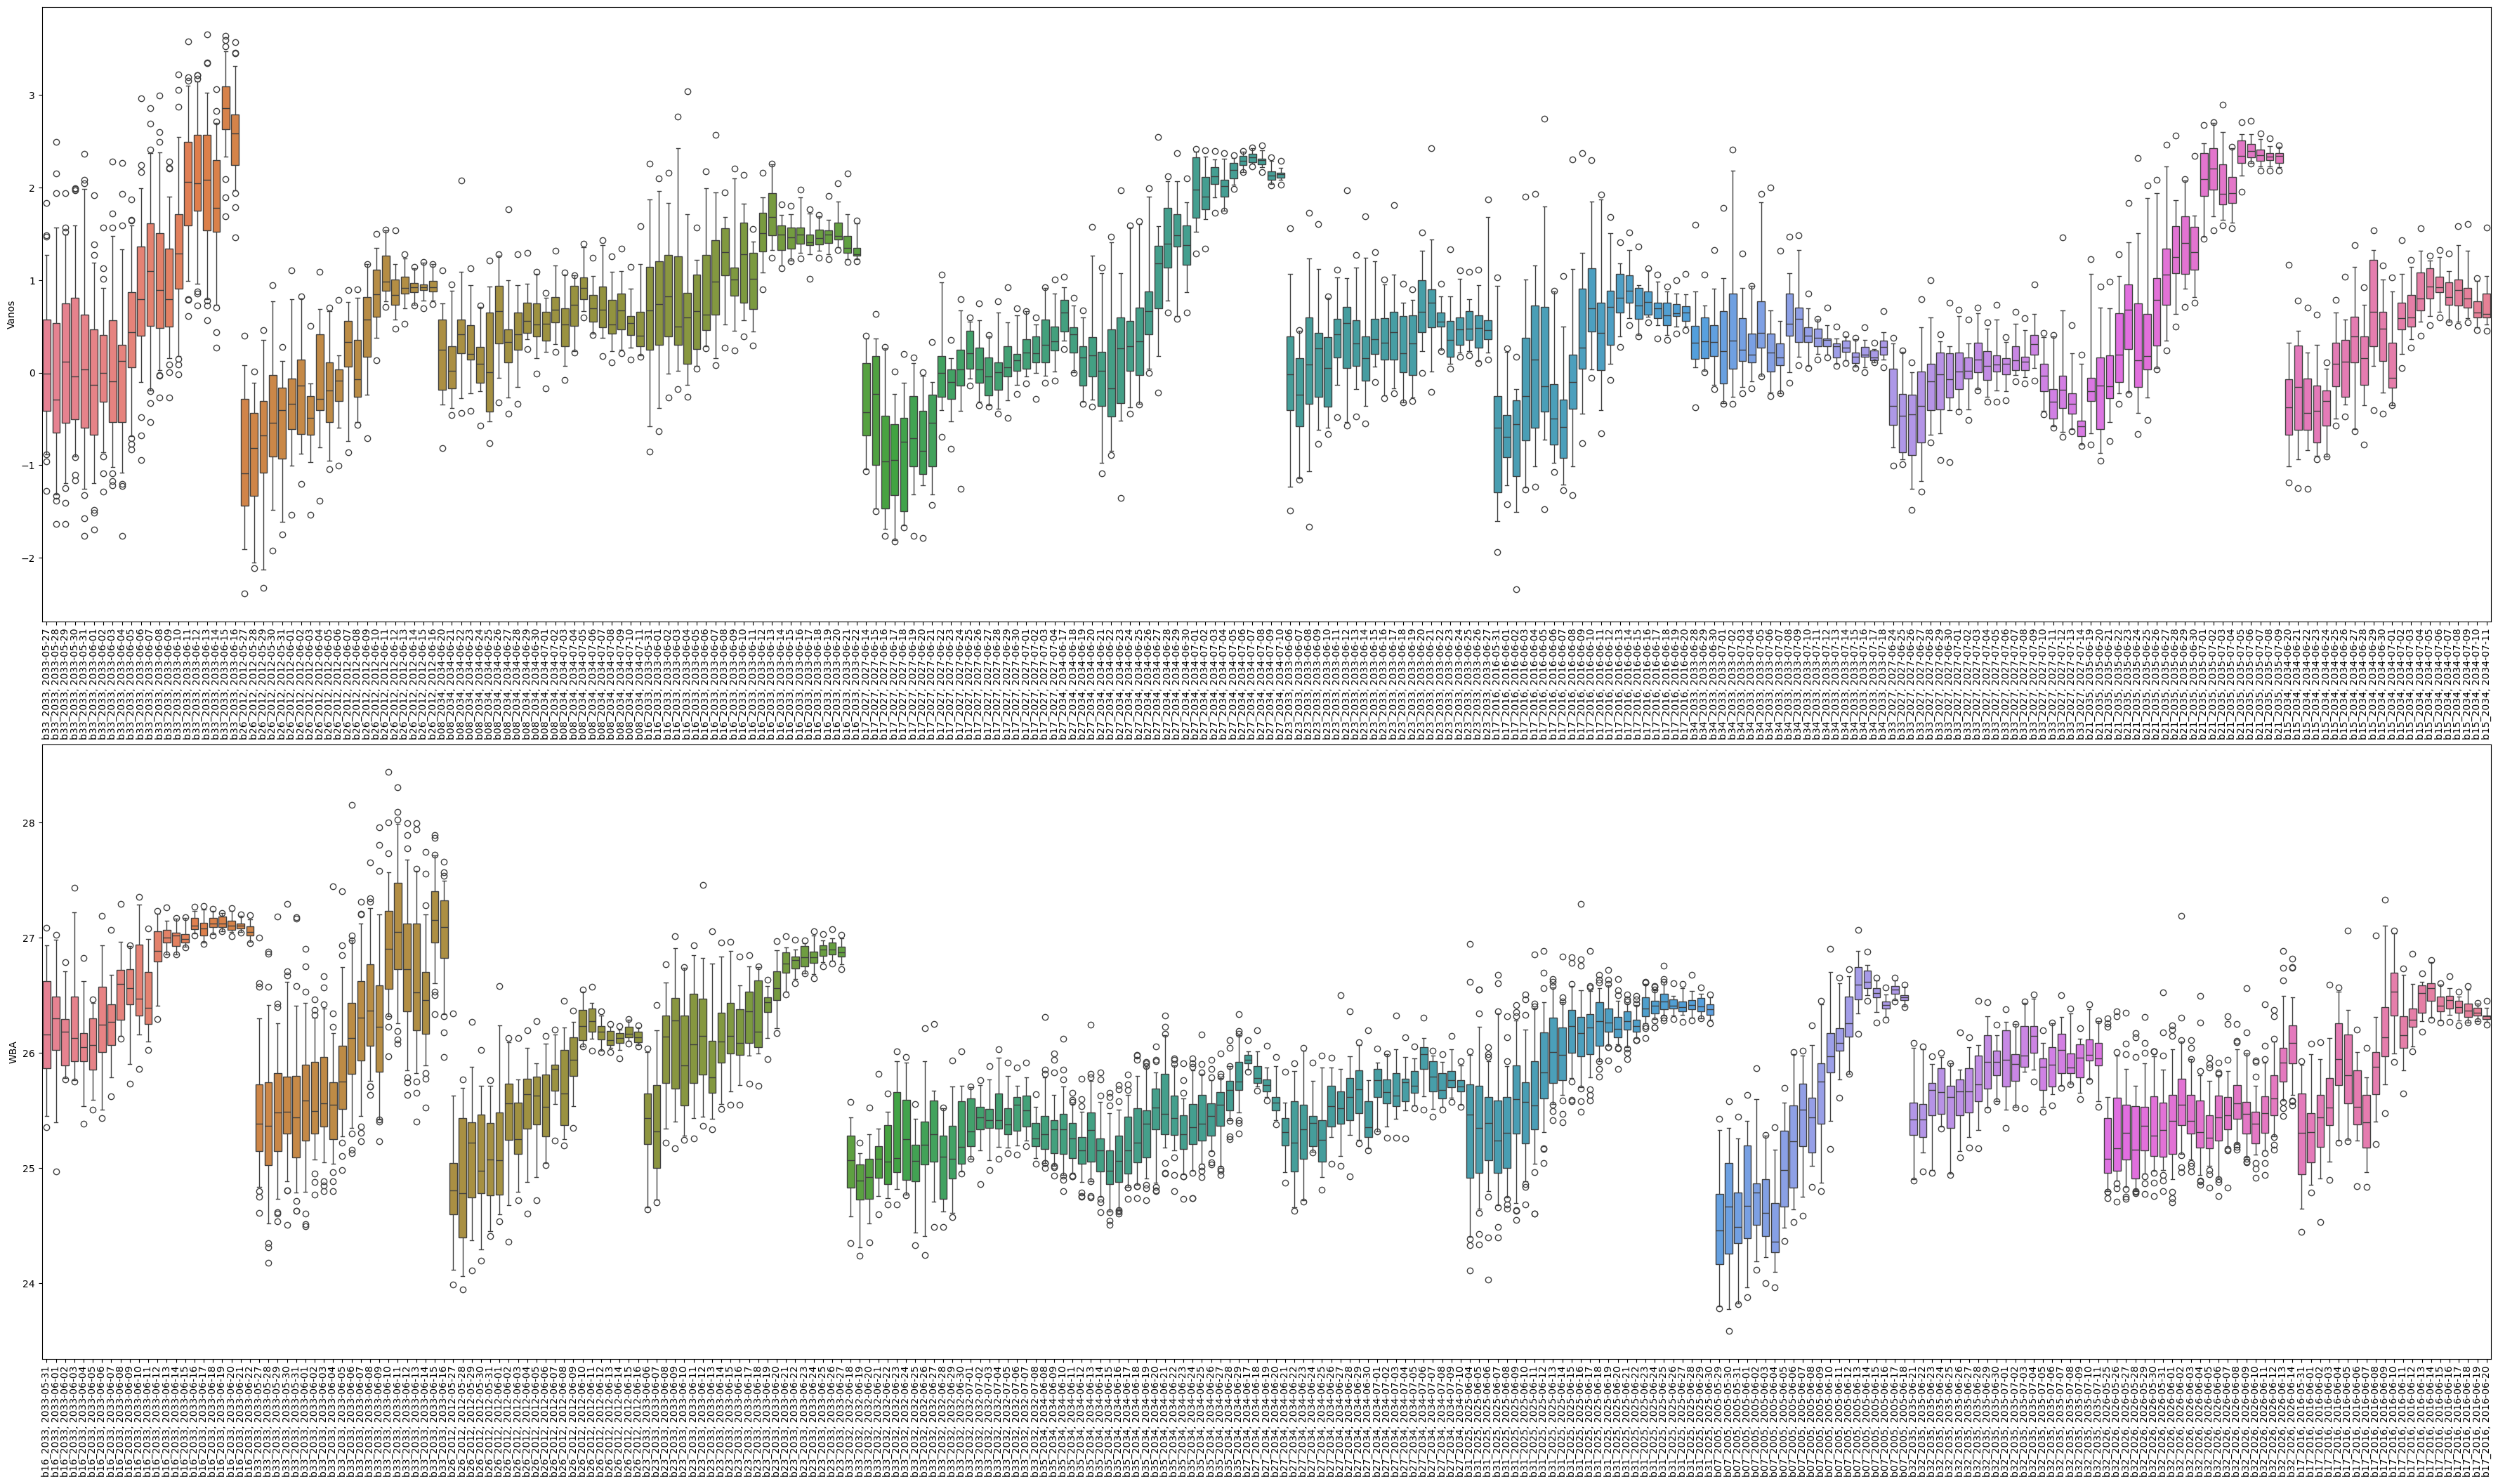

In [65]:
# === open file, rename to fit code convertions and saved separately ===
f,ax = plt.subplots(2,1,figsize=(45,25))
whis = (5,95) #whisker setting on box plot
for j,variable in enumerate(["Vanos","WBA"]):
    ds = xr.open_dataset(f"{path}{variable}_north.nc").rename({"event":"case","realization":"member"}).drop_vars(("quantile")) # open
    ds = ut.multi_to_single_index(ds,dims=("case","leadtime"),new_name="lead_ID").dropna("lead_ID",how="all") # concatenate lead time and case
    ds.to_netcdf(f"{path}{variable}_north_processed.nc")
    sns.boxplot(ds.score,ax=ax[j],whis=whis)
    ax[j].set_xticks(range(len(ds.lead_ID.values)))
    ax[j].set_xticklabels([f'{str(w)[2:10]}, {str(w)[24:34]}' for w in ds.lead_ID.values],rotation=90)
    ax[j].set_ylabel(variable)

In [73]:
# === Run ===
n_top = 200 # the number of top events to be taken into account for the allocation
n_batch = 500 # the total number of new allocated realizations
allocation_type = "Weighted"
for j,variable in enumerate(["Vanos","WBA"]):
    print(variable)
    file = f"{path}{variable}_north_processed.nc"
    %run ../code/allocation_algorithm.py {file} {n_top} {n_batch} {allocation_type}

Vanos
opening ../inputs/tor_runs/Vanos_north_processed.nc, allocation length = 200, batch size = 500
{"('b33_2033', Timestamp('2033-06-13 00:00:00'))": 46, "('b33_2033', Timestamp('2033-06-15 00:00:00'))": 183, "('b33_2033', Timestamp('2033-06-11 00:00:00'))": 45, "('b33_2033', Timestamp('2033-06-16 00:00:00'))": 94, "('b33_2033', Timestamp('2033-06-10 00:00:00'))": 15, "('b33_2033', Timestamp('2033-06-12 00:00:00'))": 48, "('b33_2033', Timestamp('2033-06-14 00:00:00'))": 18, "('b16_2033', Timestamp('2033-06-04 00:00:00'))": 5, "('b33_2033', Timestamp('2033-06-08 00:00:00'))": 6, "('b33_2033', Timestamp('2033-06-06 00:00:00'))": 4, "('b21_2035', Timestamp('2035-07-03 00:00:00'))": 5, "('b33_2033', Timestamp('2033-06-07 00:00:00'))": 5, "('b16_2033', Timestamp('2033-06-03 00:00:00'))": 3, "('b17_2016', Timestamp('2016-06-05 00:00:00'))": 3, "('b21_2035', Timestamp('2035-07-06 00:00:00'))": 4, "('b21_2035', Timestamp('2035-07-05 00:00:00'))": 5, "('b21_2035', Timestamp('2035-07-02 00:00:

## Part 3: Northern Europe, separately

In [6]:
# === open file, rename to fit code convertions and saved separately ===
for variable in ["Vanos","WBA"]:
    ds = xr.open_dataset(f"{path}{variable}_north.nc").rename({"event":"case","leadtime":"lead_ID","realization":"member"}).drop_vars(("quantile"))
    cases = [] # list of the three cases
    for case in ds.case:
        cases.append(case.values)
        ds["lead_ID"] = [f"{str(ld)[0:10]}" for ld in ds.lead_ID.values]
        ds.sel(case=case).dropna("lead_ID",how="all").drop_vars("case").to_netcdf(f"{path}boosted_{case.values}_{variable}_north.nc")

/tmp/ipykernel_59949/4093759389.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[j][i].set_xticklabels(score_case.lead_ID.values,rotation=45)
/tmp/ipykernel_59949/4093759389.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[j][i].set_xticklabels(score_case.lead_ID.values,rotation=45)
/tmp/ipykernel_59949/4093759389.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[j][i].set_xticklabels(score_case.lead_ID.values,rotation=45)
/tmp/ipykernel_59949/4093759389.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[j][i].set_xticklabels(score_case.lead_ID.values,rotation=45)
/tmp/ipykernel_59949/4093759389.py:11: UserWarning: set_ticklabels()

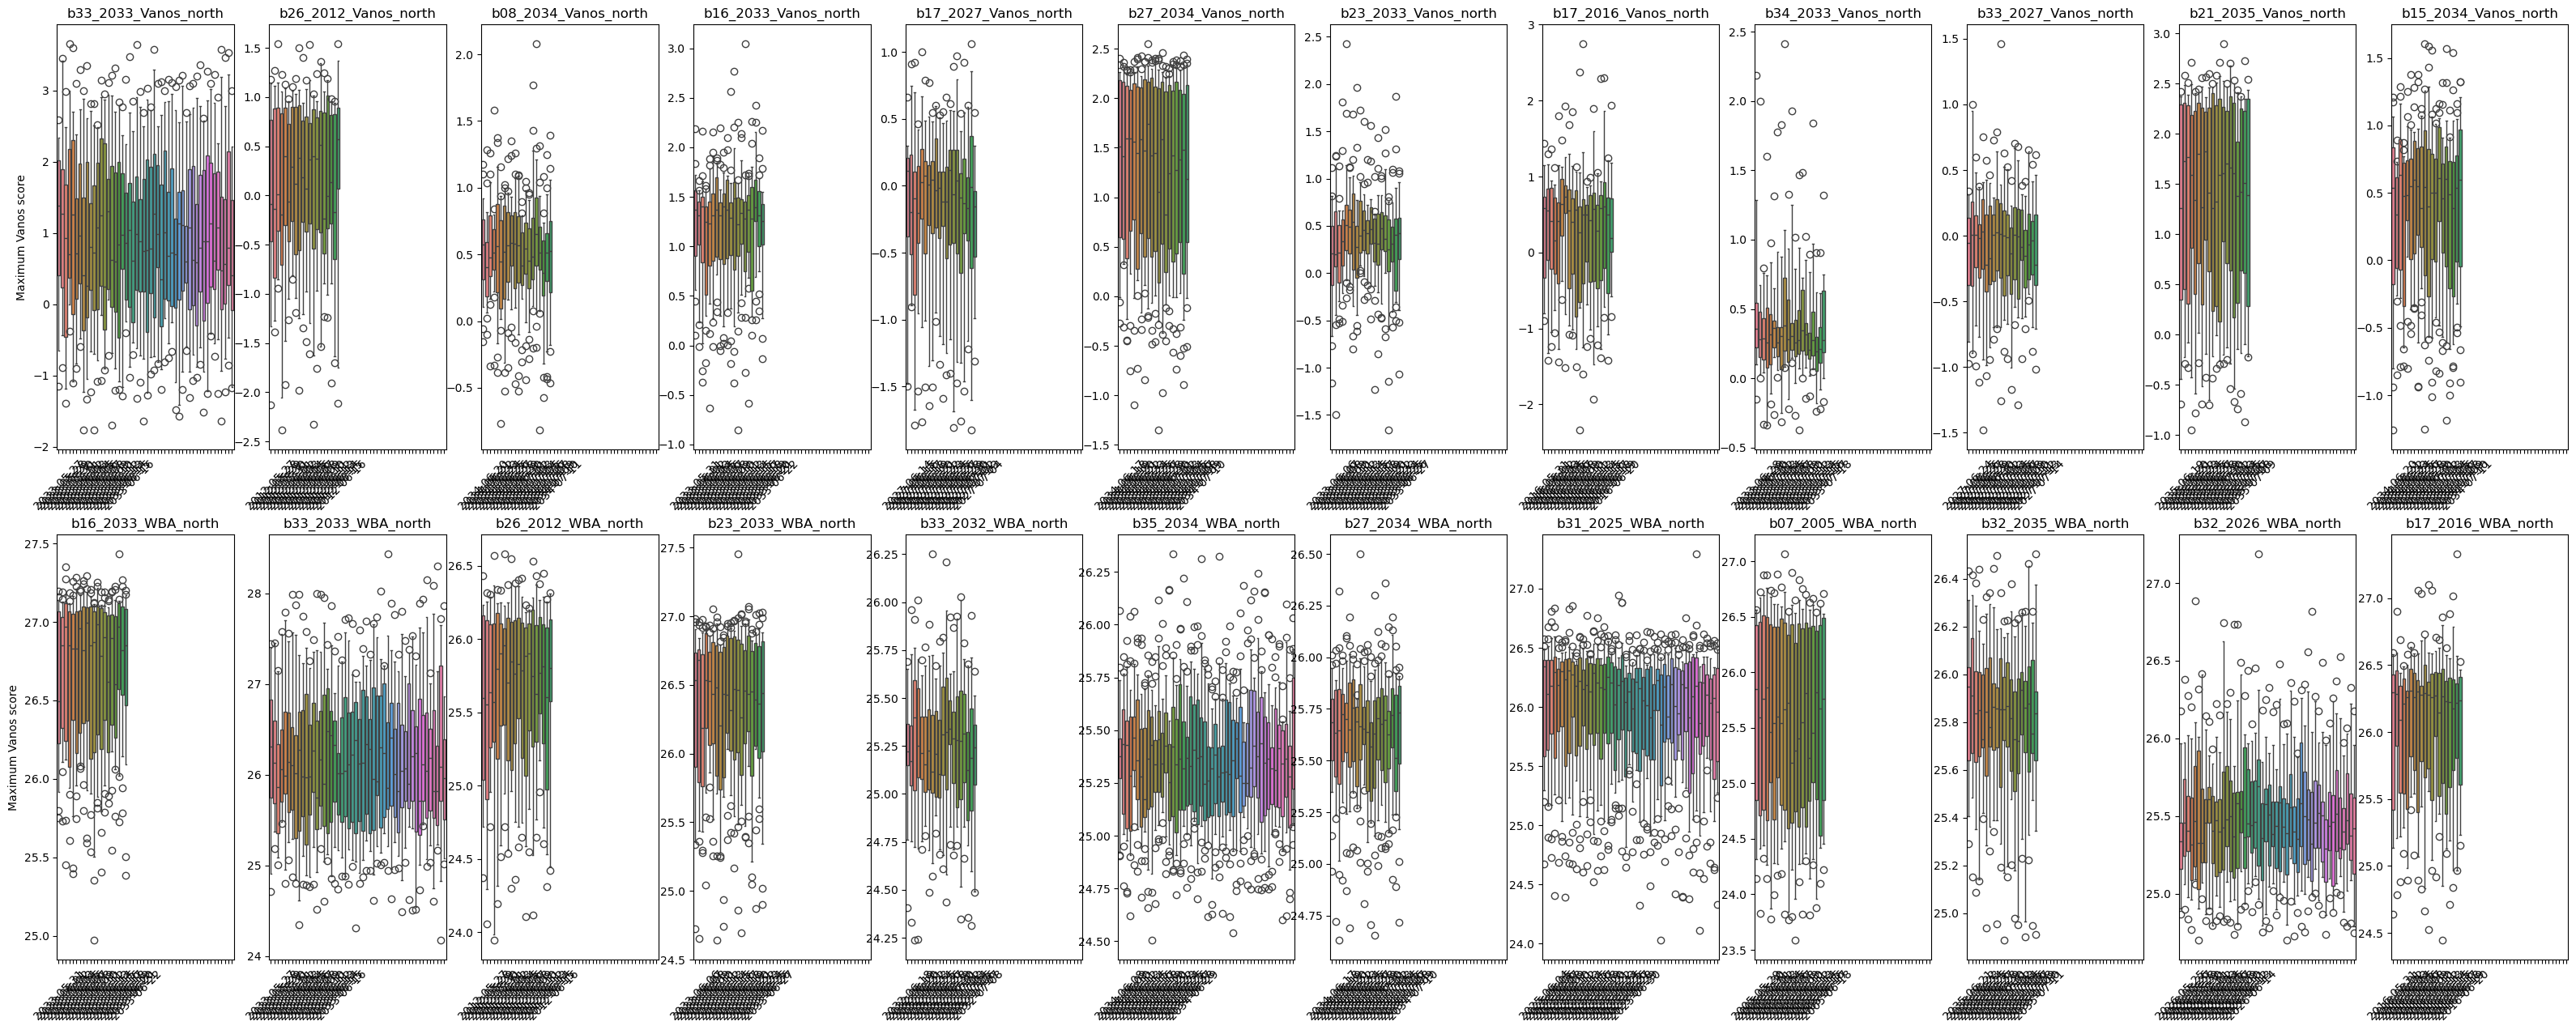

In [8]:
# === Analysis of boosted results so far ===
#figure params
f,ax = plt.subplots(2,12,figsize=(40,15))#,sharey=True)
whis = (5,95) #whisker setting on box plot
for j,variable in enumerate(["Vanos","WBA"]):
    files = glob.glob(f"{path}boosted_*_{variable}_north.nc")
    for i,f in enumerate(files):
        score_case = xr.open_dataset(f).score
        sns.boxplot(score_case,ax=ax[j][i],whis=whis)
        ax[j][i].set_title(f[27:-3])
        ax[j][i].set_xticklabels(score_case.lead_ID.values,rotation=45)
    ax[j][0].set_ylabel("Maximum Vanos score")

In [9]:
# === Run ===
n_top = 10 # the number of top events to be taken into account for the allocation
n_batch = 100 # the total number of new allocated realizations
allocation_type = "Weighted"
for j,variable in enumerate(["Vanos","WBA"]):
    files = glob.glob(f"{path}boosted_*_{variable}_north.nc")
    for i,f in enumerate(files):
        print(f[27:-3])
        %run ../code/allocation_algorithm.py {f} {n_top} {n_batch} {allocation_type}

b33_2033_Vanos_north
opening ../inputs/tor_runs/boosted_b33_2033_Vanos_north.nc, allocation length = 10, batch size = 100
{'2033-06-13': 20, '2033-06-15': 47, '2033-06-11': 14, '2033-06-16': 19}
b26_2012_Vanos_north
opening ../inputs/tor_runs/boosted_b26_2012_Vanos_north.nc, allocation length = 10, batch size = 100
{'2012-06-11': 60, '2012-06-12': 19, '2012-06-10': 21, '2012-06-13': 0}
b08_2034_Vanos_north
opening ../inputs/tor_runs/boosted_b08_2034_Vanos_north.nc, allocation length = 10, batch size = 100
{'2034-06-22': 40, '2034-06-27': 24, '2034-07-11': 15, '2034-07-07': 11, '2034-07-05': 7, '2034-07-09': 2, '2034-07-02': 1, '2034-06-29': 0}
b16_2033_Vanos_north
opening ../inputs/tor_runs/boosted_b16_2033_Vanos_north.nc, allocation length = 10, batch size = 100
{'2033-06-04': 38, '2033-06-03': 37, '2033-06-07': 17, '2033-06-13': 6, '2033-05-31': 2, '2033-06-09': 0}
b17_2027_Vanos_north
opening ../inputs/tor_runs/boosted_b17_2027_Vanos_north.nc, allocation length = 10, batch size = 10